### Question 2

[0 1 3 2]
59
26
1
17
The number of maximum DCG ordering possible for qid:4 will be : 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000
nDCG at 50: 0.35612494416255847
nDCG for whole dataset: 0.5784691984582591


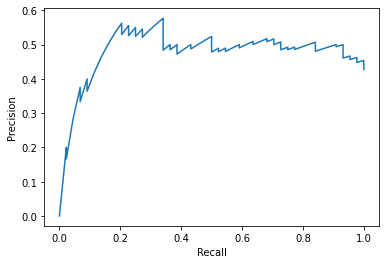

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

path = r'C:/Users/HP/Downloads/IR-assignment-2-data.txt' 
df = pd.read_csv(path, sep=' ', header=None)
file = open(path,encoding="unicode_escape",mode='r')
file_data = file.readlines()


rslt_df = df[df[1] == "qid:4"] 
print(rslt_df[0].unique())
res = 1
l = []

for val in rslt_df[0].unique():
    l.append(len(rslt_df[rslt_df[0]==val]))
    print(len(rslt_df[rslt_df[0]==val]))
    res = res * math.factorial(len(rslt_df[rslt_df[0]==val]))
dfr = rslt_df.sort_values(by = 0, ascending = False )
dfr = dfr.reset_index(drop=True)

#total files that can be made are 1!17!29!59!

dfr.to_csv('maxDCG.csv')

print("The number of maximum DCG ordering possible for qid:4 will be :",res)

def dcgAtK(df, k):
    result = 0;
    for i in range(1, k+1):
        result = result + (pow(2, df[0][i-1]) - 1)/(np.log2(i+1))
    return result


k = 50
print("nDCG at 50:",dcgAtK(rslt_df,k)/dcgAtK(dfr,k))
k = len(rslt_df)
print("nDCG for whole dataset:",dcgAtK(rslt_df,k)/dcgAtK(dfr,k))


feedback=[]
feature_score=[]
i=0
for line in file_data:
    i+=1
    if line[line.find("qid:")+4:line.find("1:")-1]=="4":
        pos=line.find("75:")
        pos1=line.find("76:")
        
        feedback.append(int(line[0]))
        
        feature_score.append(float(line[pos+3:pos1-1]))
        if float(line[pos+3:pos1-1])==0.0:
            print(line)
            
            
final = [x for _,x in sorted(zip(feature_score,feedback),reverse=True)]
relevence=0
for elem in final:
    if elem!=0:
        relevence+=1
precision=[]
recall=[]
count=0
rel=0
#print(final)
for elem in final:
    count+=1
    if elem!=0:
        rel+=1
    precision.append(rel/count)
    recall.append(rel/relevence)
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()